# Application des réseaux de neurones à de la classification multi-classe supervisée
## Chargement des librairies
Tout d'abord nous allons charger les librairies standards.

In [84]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import Neural_corr as Neur

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Position du problème
Nous aurons $n$ données d'entrées qui seront des vecteurs de $\mathbb{R}^2$, ainsi $I$ est une matrice $(2,n)$. En sortie, nous avons $n$ vecteurs de taille $3$ qui sont égaux à $[1,0,0]$ ou à $[0,1,0]$ ou à $[0,0,1]$, par convention les vecteurs de type $[1,0,0]$ seront des vecteurs de la `classe rouge`, ceux de   $[0,1,0]$ de la `classe verte` et ceux de $[0,0,1]$ de la `classe bleue`. Les vecteurs $I$ de taille $(2,n)$ et $O$ de taille $(3,n)$ sont construits dans la fonction suivante :

In [85]:
n0 = 100 # nombre de points par classe
n = n0*3 # nombre total de points
I = np.zeros((2,n))
O = np.zeros((3,n))
for j in np.arange(0,3):
    ind = np.arange(n0*(j-1),n0*j) # indices dans lesquels on range les classe
    r = np.linspace(0.0,1,n0) # radius
    t = np.linspace(j*4,(j+1)*4,n0) + np.random.randn(1,n0)*0.2 # angle
    I[0,ind] = r*np.sin(t)
    I[1,ind] = r*np.cos(t)
    O[j,ind] = 1.
print(I[:,0],O[:,0]) # on imprime le premier couple entrée/sortie

[-0. -0.] [0. 1. 0.]


Dans la fonction ci-dessous, on affiche les données, noter l'usage de la fonction `color` qui permet de colorier un point en couleur RGB.

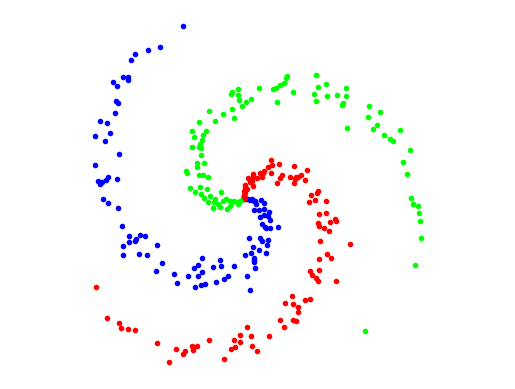

In [86]:
for i in np.arange(n):
    plt.plot(I[0,i], I[1,i], '.', color=O[:,i])
plt.axis('equal')
plt.axis('off')
plt.show()

# Régression logistique multi-classe
Le réseau de neurone va nous rendre des vecteurs de $z$ de $\mathbb{R}^3$, ce qui n'est pas interprétable pour nous, nous voulons plutôt des vecteurs $\tilde y$  dont toutes les coordonnées sont positives et dont la somme vaut $1$, ainsi on interprétera les vecteurs de sorties comme la probablité d'être dans chaque classe. Ainsi si $\tilde y$ vaut $[0.5,0.3,0.2]$, on interprétera ce vecteur comme étant un vecteur qui a une probabilité $0.5$ d'être dans la classe `rouge`, une probabilité $0.3$ dans la classe `verte` et $0.2$ dans la classe `bleue`. Pour la représentation, $\tilde y$ sera colorié dans la couleur RGB $[0.5,0.3,0.2]$.

La transformation usuelle est dite transformation `Softmax` qui correspond à faire
$$ z=\begin{pmatrix} z_1 \\ z_2 \\ z_3 \end{pmatrix} \Rightarrow \tilde y =\frac{1}{\sum_{i=1}^3 e^{z_i}}\begin{pmatrix}e^{z_1}\\ e^{z_2} \\ e^{z_3}\end{pmatrix}$$
Le problème est que le réseau de neurone travaille sur toutes les $n$ données en même temps et que $z$ sera une matrice de taille $(3,n)$. Il faut implémenter l'opération précédente sur toutes les colonnes de $z$ en même temps. On pourra penser à utiliser la fonction `a.sum(axis=0)` qui prend un tableau `a` et qui fait la somme sur chacune des premières coordonnées (les colonnes si `a` est une matrice). Implémentez ci-dessous le `forward` de la couche `Softmax`

In [87]:
import Neural as Neur
L=Neur.Softmax()
print('nb_params=',len(L.list_params))
print('structure des params :', [p.data.shape for p in L.list_params])

np.random.seed(42)
x=np.random.randn(3,2)# ici on a 2 données
print('#### : x')
print(x)
y=L.forward(x)
print('#### : y')
print(y)
# vous devez obtenir
##### : x
#[[ 0.49671415 -0.1382643 ]
# [ 0.64768854  1.52302986]
# [-0.23415337 -0.23413696]]
##### : y
#[[ 0.37814933  0.13937862]
# [ 0.43977514  0.73398479]
# [ 0.18207554  0.12663659]]

nb_params= 0
structure des params : []
#### : x
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]]
#### : y
[[0.37814933 0.13937862]
 [0.43977514 0.73398479]
 [0.18207554 0.12663659]]


On s'intéresse maintenant à écrire le `backward` de la couche `Softmax`. On a vu en cours que la formule était
$$ \hat x_{il}=y_{il}(\hat y_{il}-\sum_j y_{jl}\hat y_{jl}).$$
Où `y=Softmax(x)`.
La difficulté est que si $\hat y$,$y$ et $\hat x$ sont des vecteurs $(n,p)$ alors le vecteur $\sum_j y_{jl}\hat y_{jl}$ est un vecteur de taille $p$. Comment se comporte python si on essaie d'ajouter un vecteur de taille $p$ et un vecteur de taille $(n,p)$ ? l'exemple ci-dessous vous le dit :

In [88]:
np.random.seed(42)
a=np.arange(6).reshape((3,2))
b=np.array([3,5])
print(a.shape,b.shape)
print("a=",a)
print("b=",b)
print("a+b=",a+b)

(3, 2) (2,)
a= [[0 1]
 [2 3]
 [4 5]]
b= [3 5]
a+b= [[ 3  6]
 [ 5  8]
 [ 7 10]]


Implémentez la méthode `backward` de la couche `Softmax`

In [89]:
import Neural as Neur
L=Neur.Softmax()
np.random.seed(42)
x=np.random.randn(3,2)# ici on a 2 données
hat_y=np.random.randn(3,2)
y=L.forward(x)
hat_x=L.backward(hat_y)
print(hat_x.shape)
print(hat_x)
# Vous devez trouver
#(3, 2)
#[[ 0.48133673  0.04477097]
# [-0.34118303  0.07071478]
# [-0.14015369 -0.11548575]]


(3, 2)
[[ 0.48133673  0.04477097]
 [-0.34118303  0.07071478]
 [-0.14015369 -0.11548575]]


# Fonction perte
On implémente maintenant la fonction coût (la fonction perte). La fonction coût associée au `Softmax` est usuellement la fonction `logistique` (ou `divergence de Kullback-Leibler`), on appelera cette couche la couche `KL`. On rappelle que les données de sortie sont  $O$, un vecteur qui ne prend que comme valeurs ($[1,0,0]$, $[0,1,0]$,$[0,0,1]$). Ces données doivent être comparées avec la sortie de la couche `Softmax` que l'on appelle $x$, un vecteur de taille $3$ dont les coordonnées sont positives et somment à $1$. On a
$$d_{KL}(x)= \sum_{\ell}\left(-\sum_{i=1}^3 O_{i\ell} \ln x_{i\ell} \right)$$

* Vérifiez que $d_{KL}$ est toujours positive pour les vecteurs $x$ considérés et qu'elle s'annule uniquement si $x_i =O_i$ pour tout $i$.
* Calculez le tangent de $y=d_{KL}(x)$, on aura $\dot y = -\sum_{i,\ell} O_{i\ell}  \dot x_{i\ell}/x_{i\ell}$
* Calculez la rétropropagation de $d_{KL}$, on obtiendra 
$\hat x_{i\ell}= -\frac{O_{i\ell}}{x_{i\ell}}\hat y$

Implémentez la couche `KL`

In [90]:
np.random.seed(42)
import Neural as Neur
S=Neur.Softmax()
Output=np.array([[1,0,0],[0,1,0]]).T # Voici les output
L=Neur.KL(Output)
x=S.forward(np.random.randn(3,2))# ici on a 2 données, c'est la sortie du réseau de neurone

print(L.forward(x))
#1.2817330961

hat_y1=L.backward(1)
print(hat_y1)
#[[-2.64445797  0.        ]
# [ 0.         -1.36242606]
# [ 0.          0.        ]]

hat_y2=S.backward(hat_y1)
print(hat_y2)
#[[-0.62185067,  0.13937862],
#[ 0.43977514, -0.26601521],
#[ 0.18207554,  0.12663659]]))

1.2817330961045947
[[-2.64445797  0.        ]
 [ 0.         -1.36242606]
 [ 0.          0.        ]]
[[-0.62185067  0.13937862]
 [ 0.43977514 -0.26601521]
 [ 0.18207554  0.12663659]]


On peut même faire un test de dérivée numérique en comparant `loss(y_0,ilogit(z+sd))-loss(y_0,ilogit(z))` avec le gradient par rapport à $z$.  

In [91]:
np.random.seed(42)
import Neural as Neur
Output=np.array([[1,0,0],[0,1,0]]).T # Voici les données que l'on aimerait avoir
Input=np.random.randn(3,2)# ici on a 2 données, c'est la sortie du réseau de neurone
N=Neur.Sequential([Neur.Softmax(),Neur.KL(Output)])

tmp=N.forward(Input)
grad=N.backward(1.)

d=np.random.randn(3,2) # direction dans lequel on teste le gradient
derivee=np.sum(grad*d)
for s in [1.e-12,1.e-8,1.e-6,1.e-4,1.e-2] :
    diff=1/s*(N.forward(Input+s*d)-tmp)
    print(s,diff/derivee-1.)

1e-12 9.544171819531044e-05
1e-08 5.336250996634817e-09
1e-06 -4.060861806820526e-07
0.0001 -4.059921330534788e-05
0.01 -0.0040646996207651664


## Construction des réseaux de Neurone
Nous aurons besoin de 2 réseaux de neurones, le premier `N_a` sera utilisé pour l'apprentissage et le deuxième `N` sera utilisé une fois les données apprises. 
* Pour l'instant le réseau `N` sera composé d'une couche dense $(2,15)$ suivie d'une couche arctangente puis d'une couche dense $(15,3)$ et d'une couche arctangente. Le réseau `N` simule bien une fonction de $\mathbb{R}^2$ dans $\mathbb{R}^3$. Finalement on prendra comme dernière couche la couche `SoftMax`
* Le réseau `N_a` est utilisé pour l'apprentissage, ce sera juste le réseau composé de `N` suivi de la couche `KL`. Comme les données sont stockées dans les couches, une fois l'apprentissage terminé, on ne se souciera plus de `N_a`. Voici un des avantages de considérer les réseaux de neurones comme des couches. Il existe un autre avantage dans les auto-encodeurs.
Créez vos réseaux de Neurones dans la ligne ci-dessous.

In [92]:
np.random.seed(42)
import Neural as Neur
N= # definition de N ici
N_a= # definition de N_a ici

## Encore une fonction d'affichage des données

Pour pouvoir interpréter le résultat du réseau de Neurone `N`, on va tracer $N.forward(x)$ pour une série de points sur une grille, c'est ce qui est donné par la fonction suivante :

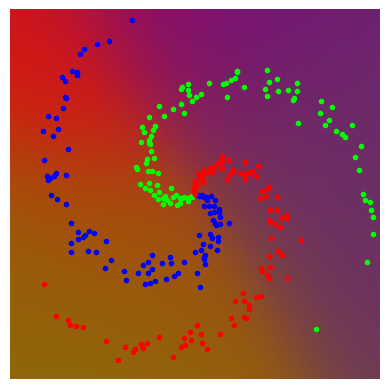

In [93]:
def plot_N(Net) : # ici N est un réseau de neurone
    plt.clf
    q=100 # nombre de points dans chaque direction de la grille
    t = np.linspace(-1,1,q)
    [Yg,Xg] = np.meshgrid(t,t)
    Z = np.vstack([Xg.flatten(), Yg.flatten()])
    U = Net.forward(Z) # evaluation du reseau de neurone
    U = np.reshape(U.transpose(), [q,q,3] ) # reshape de la matrice
    plt.imshow(U.transpose((1, 0, 2)), origin="lower", extent=[-1,1,-1,1]) # plot de la matrice des données
    for i in np.arange(n):
        plt.plot(I[0,i], I[1,i], '.', color=O[:,i]) # plot des vraies données
    plt.axis('off')
plot_N(N)

## Et maintenant place à l'optimisation

On va enfin lancer notre algorithme d'optimisation !!! on va se contenter pour l'instant d'un algo à pas fixe de .01/15. Pour rappel, normalement la variable $I$ contient les données d'entrées et la variable $O$ les données de sortie. Toutes les $400$ itérations, on affiche le coût et on dessine le réseau de neurone sur une grille en utilisant la fonction `plot_N`.

A vous...


0 484.1348376142473


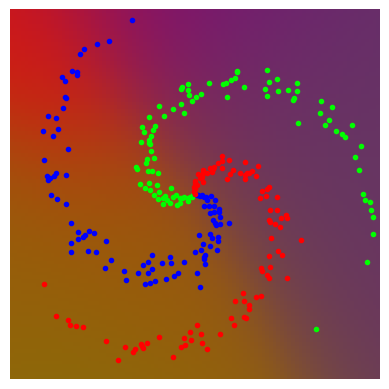

400 282.8767915894322


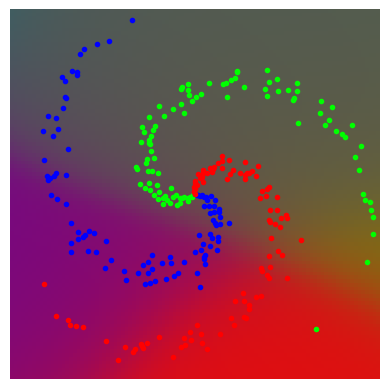

800 218.19515205606456


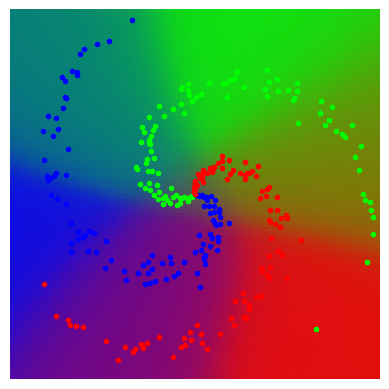

1200 209.50388877530892


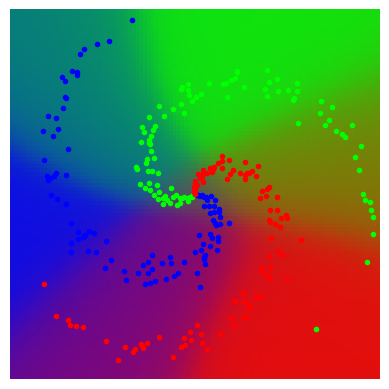

1600 199.283964333408


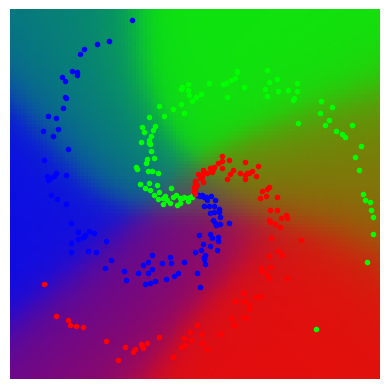

2000 174.10244144343523


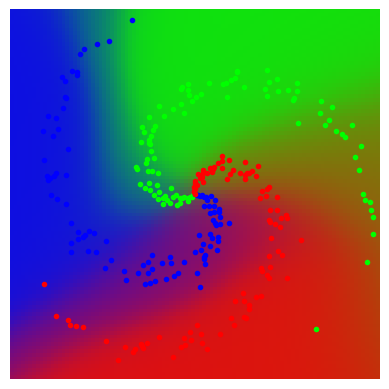

2400 119.0569400280814


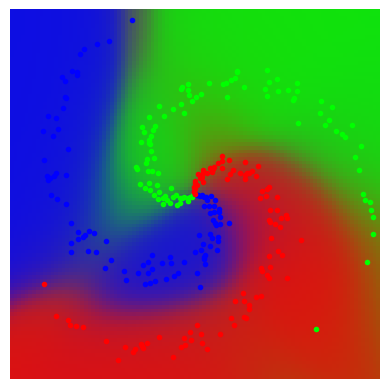

2800 100.40734648407968


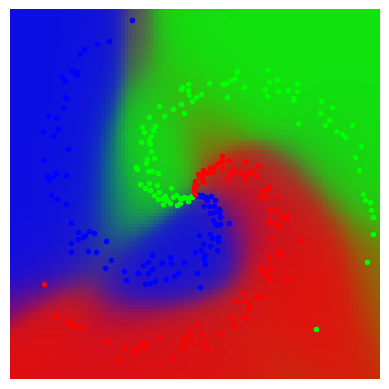

3200 90.08705361122536


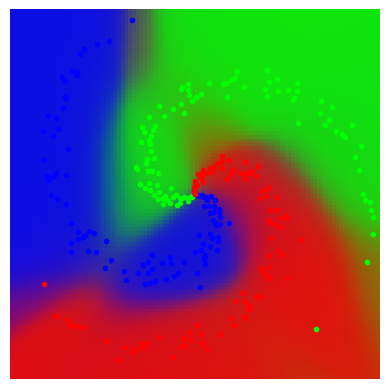

3600 83.10614652514491


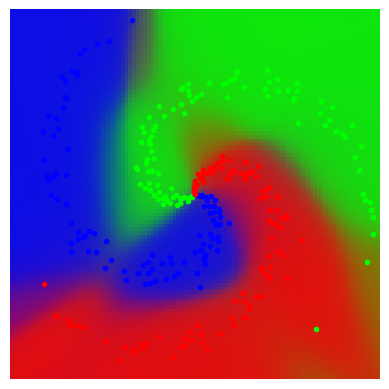

4000 77.39730077321605


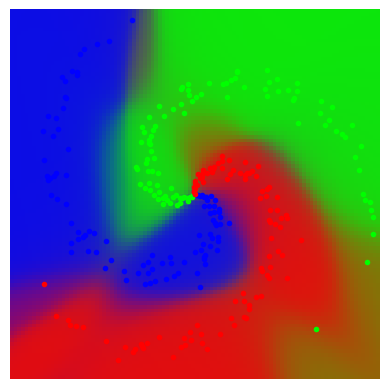

4400 73.12489022497394


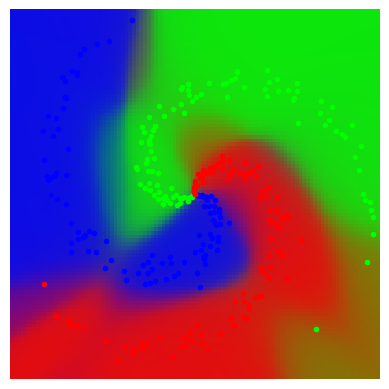

4800 69.95678280443866


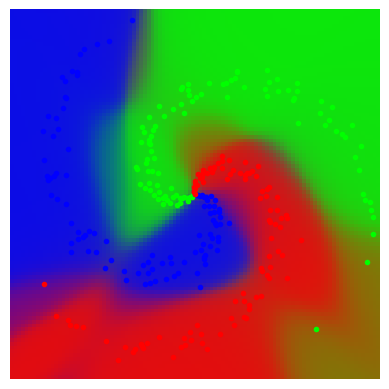

5200 67.44843639575824


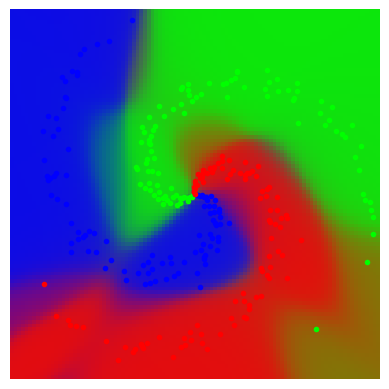

5600 65.3851210343482


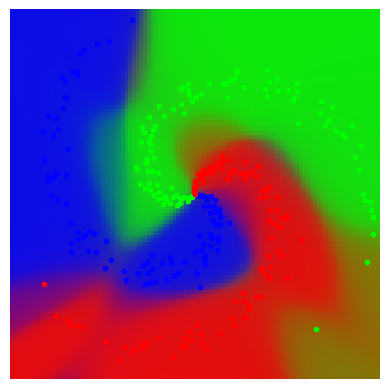

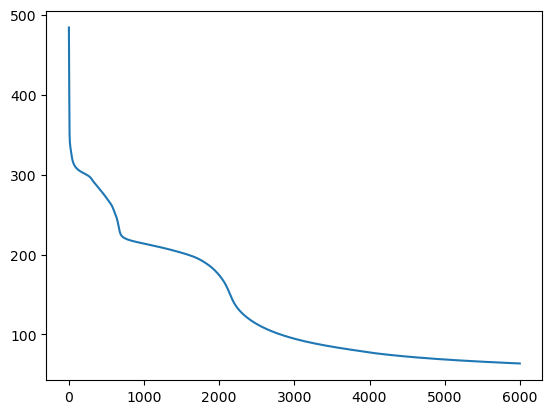

In [94]:
tau = .01/15
niter = 6000
np.random.seed(42)
import Neural as Neur
N= # definition de N ici
N_a= # definition de N_a ici

cost=np.zeros(niter)
for it in np.arange(0,niter):
    pass
    # Votre algorithme de gradient

plt.plot(cost)